<a href="https://colab.research.google.com/github/estevaomcs/PROJETO-SOJA/blob/main/PROJETO_SOJA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA 
import numpy as np
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

from IPython.display import Image


In [ ]:
#CÓDIGO_PARA_LER_AQRUIVOSDO_DRIVE
#!pip install -U -q PyDrive
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials

In [ ]:
#AUTENTICANDO_A_COONTA_DO_DRIVE
#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

df=pd.read_excel(r'/content/drive/MyDrive/ECONOMIA/Mestrado KRALHOOO/PY_SOJA .xlsx')

In [ ]:
df[df["REGIAO"]=='CENTRO-OESTE'].describe()

,ANO,AREA_COLHIDA_HC,PREÇO_SC,QUANTIDADE_SC_60KG,PRODUÇÃO_TN(MIL),RECEITA_BRUTA_R$(MIL),DOLAR,CUSTOS
count,14.0000,14.000000,14.000000,1.400000e+01,1.400000e+01,1.400000e+01,14.000000,0.0
mean,2015.5000,14280.435714,71.147143,7.754819e+05,4.652892e+07,6.200172e+07,3.230500,NaN
std,4.1833,2863.036004,40.534762,2.114600e+05,1.268760e+07,5.294819e+07,1.317108,NaN
min,2009.0000,9900.100000,30.220000,4.855817e+05,2.913490e+07,1.590917e+07,1.675000,NaN
25%,2012.2500,11815.950000,51.082500,5.950242e+05,3.570145e+07,3.175773e+07,2.037600,NaN
50%,2015.5000,14770.600000,56.695000,7.310100e+05,4.386060e+07,4.373724e+07,3.261750,NaN
75%,2018.7500,15989.300000,69.510500,9.218889e+05,5.531334e+07,6.319198e+07,3.872375,NaN
max,2022.0000,19140.900000,166.390000,1.135433e+06,6.812600e+07,1.889247e+08,5.395000,NaN


In [ ]:
#SUL
DF_SUL = df[df["REGIAO"]=='SUL']
REC_SUL = DF_SUL["RECEITA_BRUTA_R$(MIL)"]
ANO_SUL = DF_SUL["ANO"]

#SUDESTE
DF_SUDESTE = df[df["REGIAO"]=='SUDESTE']
REC_SUDESTE = DF_SUDESTE["RECEITA_BRUTA_R$(MIL)"]
ANO_SUDESTE = DF_SUDESTE["ANO"]

#NORTE
DF_NORTE = df[df["REGIAO"]=='NORTE']
REC_NORTE = DF_NORTE["RECEITA_BRUTA_R$(MIL)"]
ANO_NORTE = DF_NORTE["ANO"]

#CENTROOESTE
DF_CENTROOESTE = df[df["REGIAO"]=='CENTRO-OESTE']
REC_CENTROOESTE = DF_CENTROOESTE["RECEITA_BRUTA_R$(MIL)"]
ANO_CENTROOESTE = DF_CENTROOESTE["ANO"]

#NORDESTE
DF_NORDESTE = df[df["REGIAO"]=='NORDESTE']
REC_NORDESTE = DF_NORDESTE["RECEITA_BRUTA_R$(MIL)"]
ANO_NORDESTE = DF_NORDESTE["ANO"]


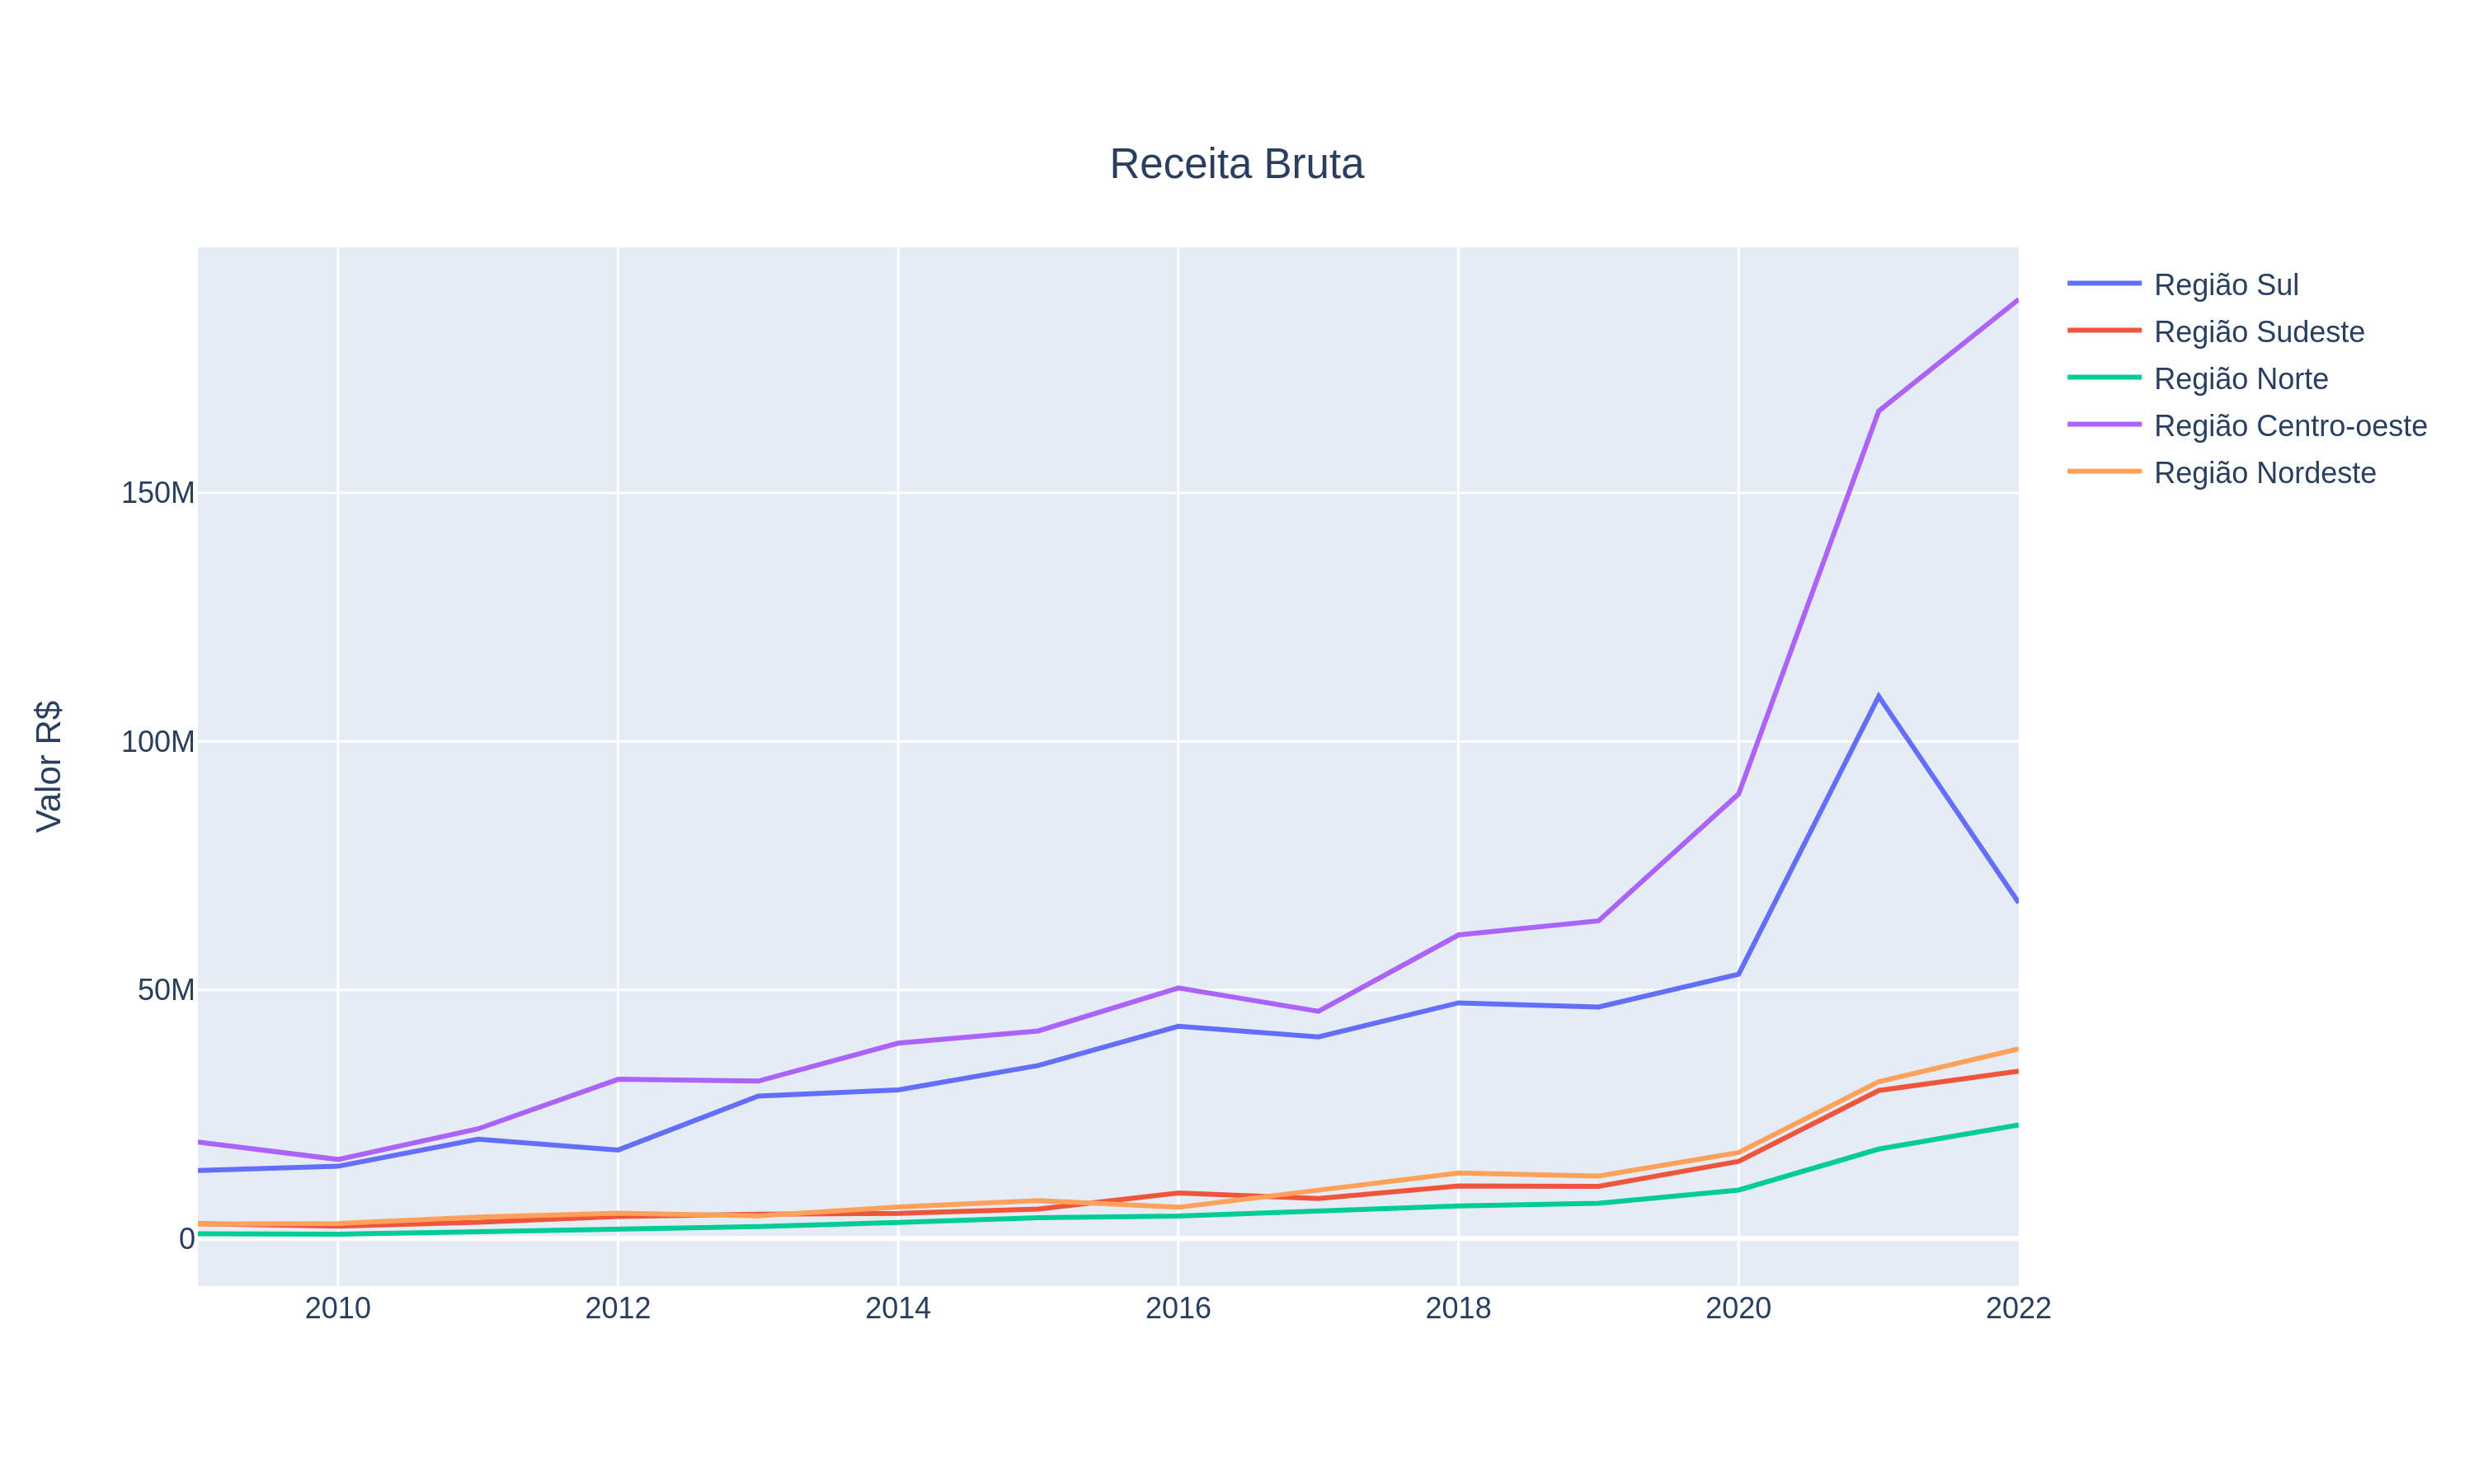

In [ ]:
#GRAPH_SUL
rcdsul = REC_SUL
anosul = ANO_SUL
fig = go.Figure()
fig.add_trace(go.Scatter(x=anosul, y=rcdsul, mode = 'lines', name = 'Região Sul'))
#GRAPH_SUDESTE
rcsudeste = REC_SUDESTE
anosudeste = ANO_SUDESTE
fig.add_trace(go.Scatter(x=anosudeste, y=rcsudeste, mode = 'lines', name = 'Região Sudeste'))
#GRAPH_NORTE
rcnorte = REC_NORTE
anonorte = ANO_NORTE
fig.add_trace(go.Scatter(x=anonorte, y=rcnorte, mode = 'lines', name = "Região Norte"))
#GRAPH_CENTROOESTE
rccentrooeste = REC_CENTROOESTE
anocentrooeste = ANO_CENTROOESTE
fig.add_trace(go.Scatter(x=anocentrooeste, y=rccentrooeste, mode = 'lines', name = 'Região Centro-oeste'))
#GRAPH_NORDESTE
rcnordeste = REC_NORDESTE
anonordeste = ANO_NORDESTE
fig.add_trace(go.Scatter(x=anonordeste, y=rcnordeste, mode = 'lines', name = 'Região Nordeste'))

fig.update_layout(
    title={
        'text': "Receita Bruta",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_yaxes(title_text="Valor R$")
#fig.show()

img_bytes1 = fig.to_image(format="png", width=1000, height=600, scale=3, engine='kaleido')
Image(img_bytes1)



In [ ]:
#GRAPH_DOLAR

fig3 = go.Figure()
fig3.add_trace(go.Bar(x=anosul, y=dlsul, name = "Dolar($)", text = DF_SUL['DOLAR'],
                      textposition = 'outside', marker_color='lightsalmon'))

fig3.update_traces(texttemplate='%{text:$.2s}')
fig3.update_layout(
    title={
        'text': "Dolar",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig3.update_yaxes(title_text="Dolar")
#fig3.show()

img_bytes3 = fig3.to_image(format="png", width=1000, height=600, scale=3, engine='kaleido')
Image(img_bytes3)


In [ ]:
pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.0 MB/s eta 0:00:00


In [ ]:
#AUMENTANDO O TAMANHO DA IMAGEM
import kaleido #required
kaleido.__version__ #0.2.1
from kaleido.scopes.plotly import PlotlyScope
from IPython.display import Image
import plotly.express as px
img_bytes = fig.to_image(format="png", width=1000, height=500, scale=4, engine='kaleido')
Image(img_bytes)



INICIO DO MODELO DE PREVISÃO DE RECEITA


In [ ]:
#GRAPH_NORTE
DF_NORTE = df[df['REGIAO']=='NORTE']
ANO_NORTE = DF_NORTE['ANO']
REC_NORTE = DF_NORTE['RECEITA_BRUTA_R$(MIL)']

anonorte = ANO_NORTE
recnorte = REC_NORTE


#GRAPH_REC

fig4 = go.Figure()
fig4.add_trace(go.Bar(x=anonorte, y=recnorte, name = 'Região Norte', text = DF_NORTE['RECEITA_BRUTA_R$(MIL)'], 
                      textposition = 'outside', marker_color='lightsalmon'))

fig4.update_traces(texttemplate='R$ %{text:.2s}')
fig4.update_layout(
    title={
        'text': "Receita Safra Soja Região Norte",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig4.update_yaxes(title_text="Valor R$")

img_bytes = fig4.to_image(format="png", width=1000, height=600, scale=3)
Image(img_bytes)


In [ ]:
#GRAPH_NORDESTE
DF_NORDESTE = df[df['REGIAO']=='NORDESTE']
ANO_NORDESTE = DF_NORDESTE['ANO']
REC_REC_NORDESTE = DF_NORDESTE['RECEITA_BRUTA_R$(MIL)']

anonordeste = ANO_NORDESTE
recnordeste = REC_NORDESTE


#GRAPH_REC

fig5 = go.Figure()
fig5.add_trace(go.Bar(x=anonordeste, y=recnordeste, name = 'Região Nordeste', text = DF_NORDESTE['RECEITA_BRUTA_R$(MIL)'], 
                      textposition = 'outside', marker_color='lightsalmon'))

fig5.update_traces(texttemplate='R$ %{text:.2s}')
fig5.update_layout(
    title={
        'text': "Receita Safra Soja Região Nordeste",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig5.update_yaxes(title_text="Valor R$")

img_bytes = fig5.to_image(format="png", width=1000, height=600, scale=3)
Image(img_bytes)

In [ ]:
#GRAPH_CENTROOESTE
DF_CENTROOESTE = df[df['REGIAO']=='CENTRO-OESTE']
ANO_CENTROOESTE = DF_CENTROOESTE['ANO']
REC_CENTROOESTE = DF_CENTROOESTE['RECEITA_BRUTA_R$(MIL)']

anocentrooeste = ANO_CENTROOESTE
reccentrooeste = REC_CENTROOESTE


#GRAPH_REC

fig6 = go.Figure()
fig6.add_trace(go.Bar(x=anocentrooeste, y=reccentrooeste, name = 'Região Centro-oeste', text = DF_CENTROOESTE['RECEITA_BRUTA_R$(MIL)'], 
                      textposition = 'outside', marker_color='lightsalmon'))

fig6.update_traces(texttemplate='R$ %{text:.2s}')
fig6.update_layout(
    title={
        'text': "Receita Safra Soja Região Centro-oeste",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig6.update_yaxes(title_text="Valor R$")

img_bytes = fig6.to_image(format="png", width=1000, height=600, scale=3)
Image(img_bytes)

In [ ]:
#GRAPH_SUDESTE
DF_SUDESTEE = df[df['REGIAO']=='SUDESTE']
ANO_SUDESTE = DF_SUDESTE['ANO']
REC_SUDESTE = DF_SUDESTE['RECEITA_BRUTA_R$(MIL)']

anosudeste = ANO_SUDESTE
recsudeste = REC_SUDESTE


#GRAPH_REC

fig7 = go.Figure()
fig7.add_trace(go.Bar(x=anosudeste, y=recsudeste, name = 'Região Sudeste', text = DF_SUDESTE['RECEITA_BRUTA_R$(MIL)'], 
                      textposition = 'outside', marker_color='lightsalmon'))

fig7.update_traces(texttemplate='R$ %{text:.2s}')
fig7.update_layout(
    title={
        'text': "Receita Safra Soja Região Sudeste",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig7.update_yaxes(title_text="Valor R$")

img_bytes = fig7.to_image(format="png", width=1000, height=600, scale=3)
Image(img_bytes)

In [ ]:
#GRAPH_SUL
DF_SUL = df[df['REGIAO']=='SUL']
PROD_SUL = DF_SUL['PRODUÇÃO_TN(MIL)']
ANO_SUL = DF_SUL['ANO']
DL_SUL = DF_SUL['DOLAR']
REC_SUL = DF_SUL['RECEITA_BRUTA_R$(MIL)']

prodsul = PROD_SUL
anosul = ANO_SUL
dlsul = DL_SUL
recsul = REC_SUL

#GRAPH_DOLAR

fig3 = go.Figure()
fig3.add_trace(go.Bar(x=anosul, y=dlsul, name = "Dolar($)", text = DF_SUL['DOLAR'],
                      textposition = 'outside', marker_color='lightsalmon'))

fig3.update_traces(texttemplate='%{text:$.2s}')
fig3.update_layout(
    title={
        'text': "Dolar",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig3.update_yaxes(title_text="Dolar")

#GRAPH_PROD

fig2 = go.Figure()
fig2.add_trace(go.Bar(x=anosul, y=recsul, name = 'Região Sul', text = DF_SUL['RECEITA_BRUTA_R$(MIL)'], 
                      textposition = 'outside', marker_color='lightsalmon'))

fig2.update_traces(texttemplate='R$%{text:.2s}')
fig2.update_layout(
    title={
        'text': "Receita Safra Soja Região Sul",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig2.update_yaxes(title_text="Valor R$")

#fig2.show()
#fig3.show()
img_bytes = fig2.to_image(format="png", width=1000, height=600, scale=3)
Image(img_bytes)


In [ ]:
recsul

SEPARANDO OS DANDOS ENTRE PARA TREINO E PARA EXECUÇÃO DO MODELO

In [ ]:
X = DF_SUL.drop(['ANO', 'REGIAO', 'RECEITA_BRUTA_R$(MIL)', 'CUSTOS'], axis=1)
Y = DF_SUL['RECEITA_BRUTA_R$(MIL)']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.1, random_state = 2)

MONTANDO O MODELO DE PREVISÃO

In [ ]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

AVALIAÇÃO DO MODELO  

In [ ]:
training_data_prediction = lin_reg_model.predict(X_train)
erros = metrics.r2_score(Y_train, training_data_prediction)
print("R² é igual a: ", erros)

R² é igual a:  0.9918026760284052


VISUALIZANDO OS RESULTADOS DO MODELO

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Receita verdadeira")
plt.ylabel("Receita estimada")
plt.title("Previsão de receita")

In [ ]:
fig4 = go.Figure()
fig4.add_trace(go.Scatter(x=anosul, y=Y_train, name = 'Região Sul Real', mode = 'markers+text', marker_size=6, text = Y_train, textposition='top center', marker_color='green'))
fig4.update_traces(texttemplate='R$ %{text:.2s}')
fig4.add_trace(go.Scatter(x=anosul, y=training_data_prediction, name = 'Região Sul Estimados', marker_size=6, mode = 'markers+text', text = training_data_prediction, textposition='bottom center', marker_color='red'))
fig4.update_traces(texttemplate='R$ %{text:.2s}')
fig4.update_layout(
    title={
        'text': "Receita anual da Soja dados Reais x Previstos",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig4.update_yaxes(title_text="Receita R$")


fig4.show()





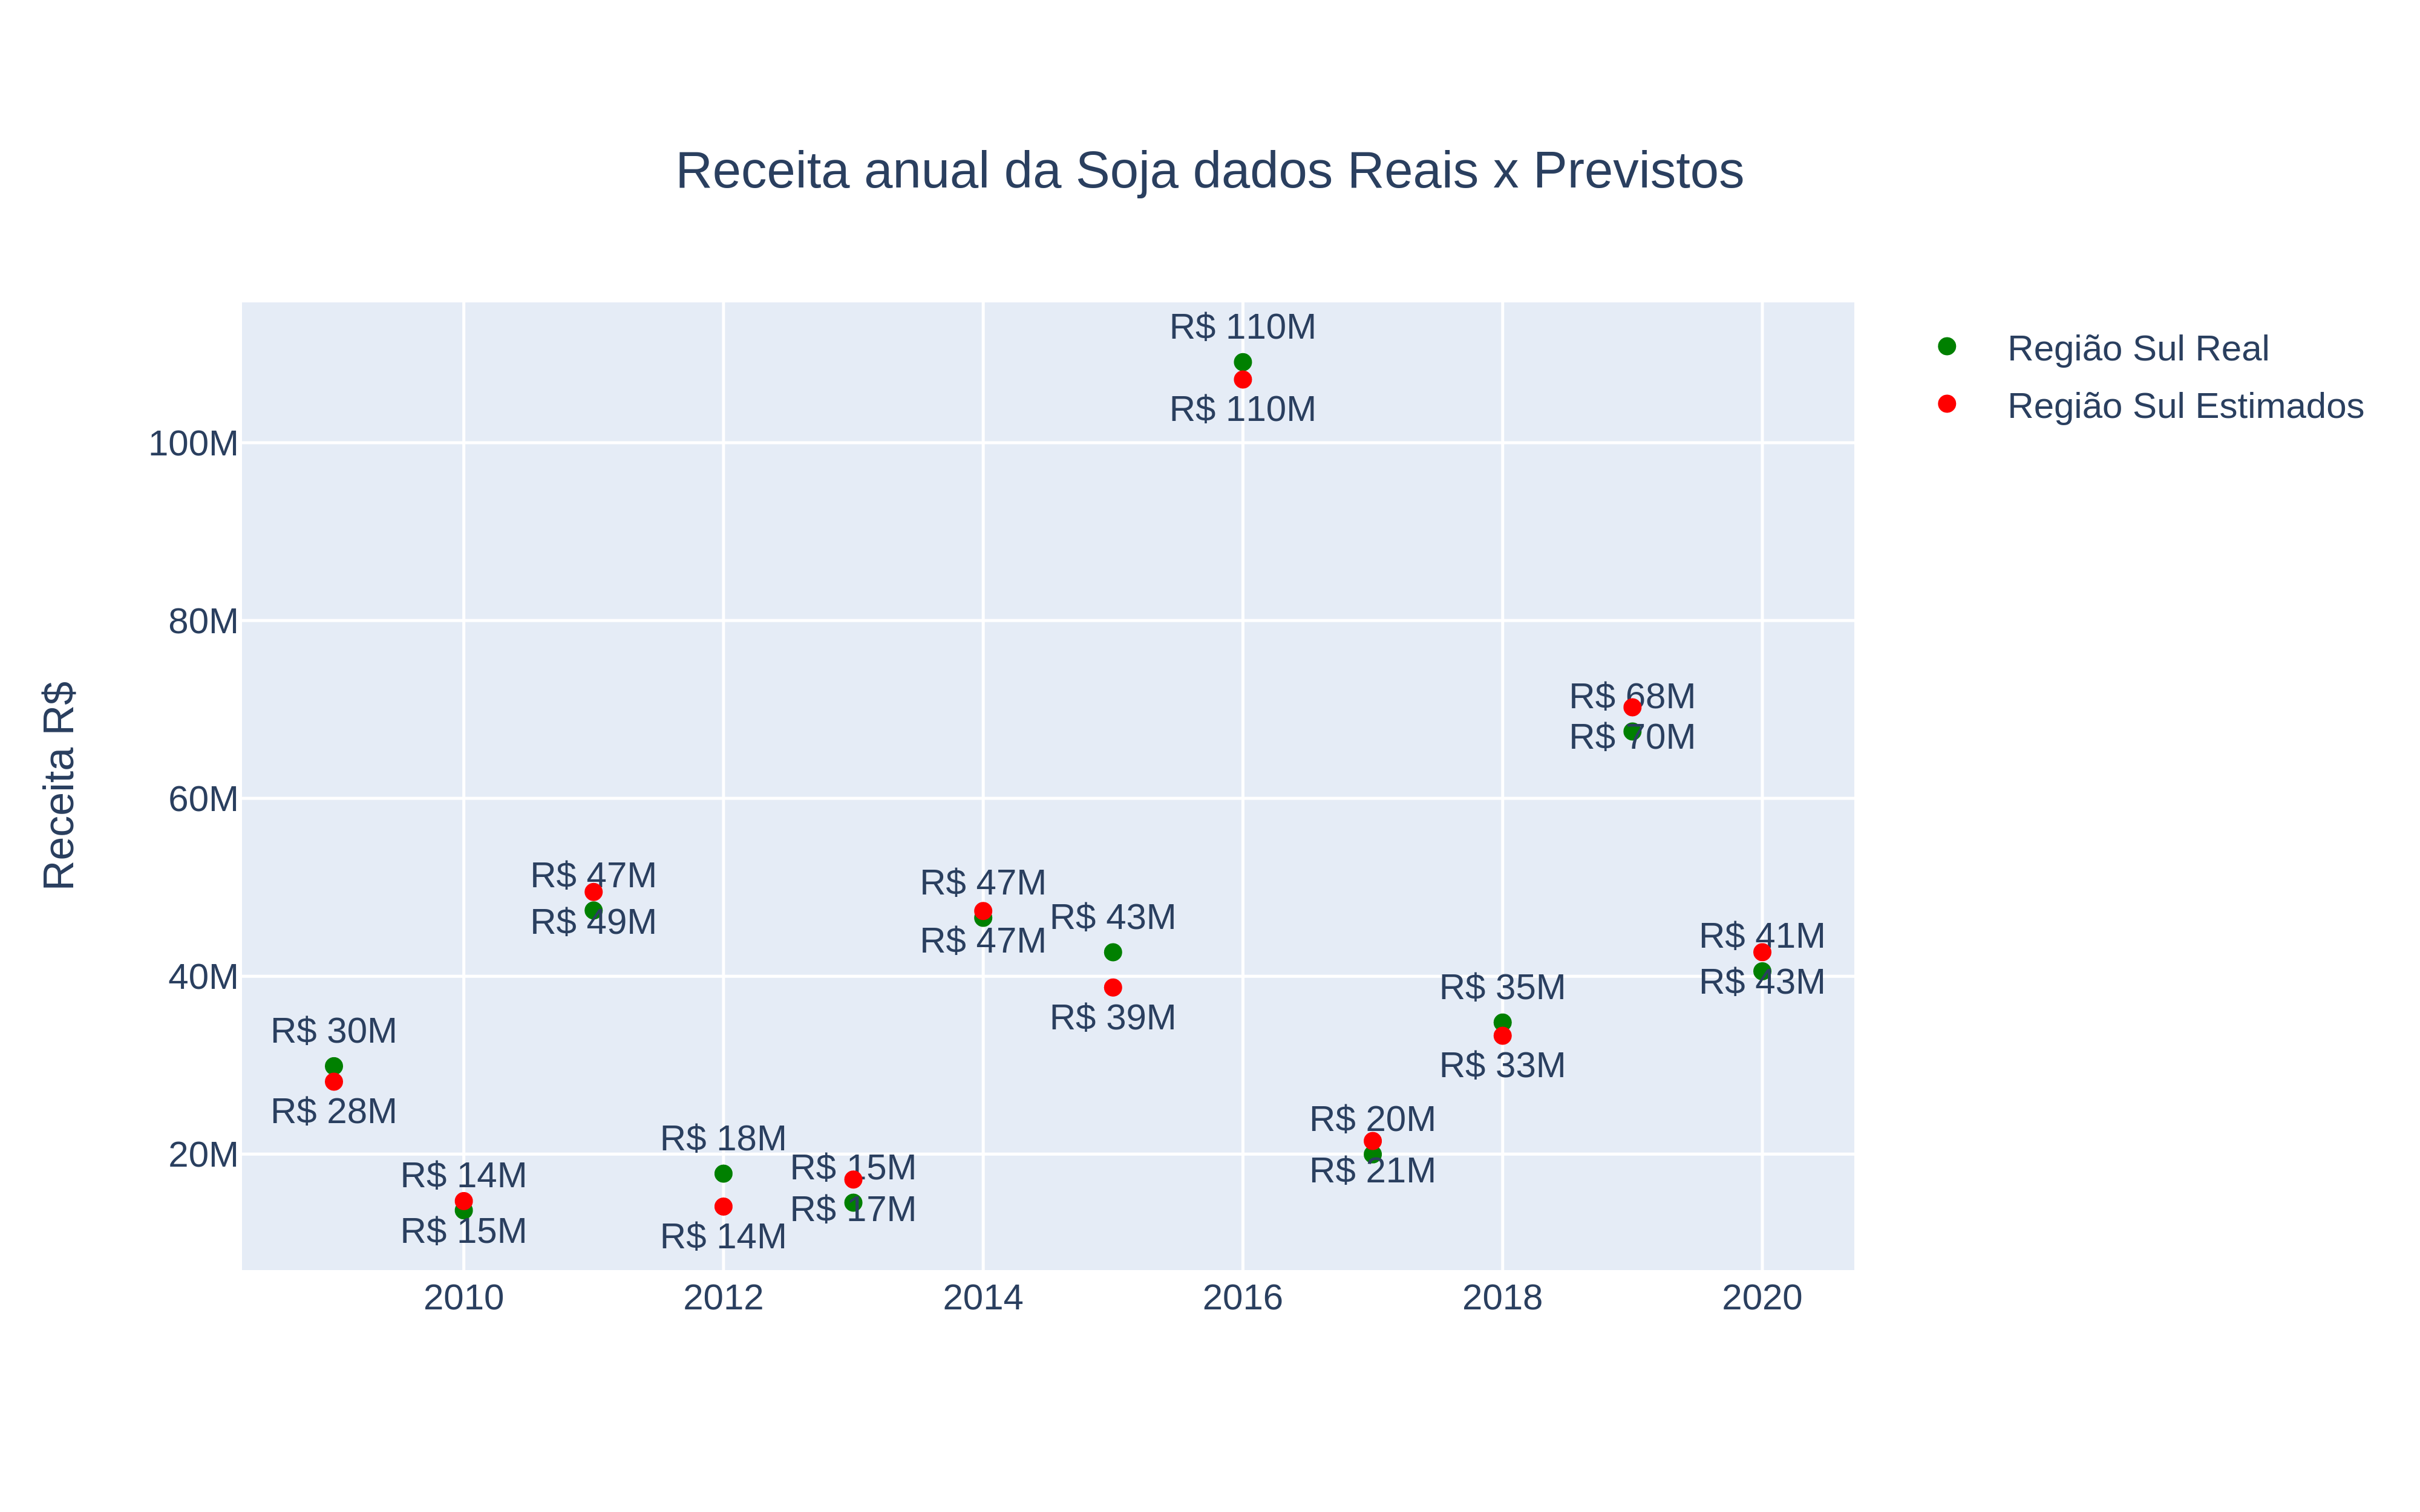

In [ ]:
fig4img = fig4.to_image(format='png', width=800, height=500, scale=5)
Image(fig4img)



In [ ]:
#TRANSFORMANDO_EM_DATA_FRAME

#df3 = pd.DataFrame(Y_train)
#DF_SUL["XTRAININGDATA"]= df3
#DF_SUL['YTRAIN'] = pd.Series(Y_train)
#pd.to_numeric(training_data_prediction, downcast='float')
#DF_SUL["XTRAININGDATA"]= pd.Series(training_data_prediction)